In [2]:
import pandas as pd
import numpy
import random
import datetime
import calendar
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected =True)
cf.go_offline()


'''importing the required libraries'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
#plt.style.use('bmh')

In [3]:
# Generating a synthetic data using numpy and pandas libraries

def generate_random_time(month):
  day = generate_random_day(month)
  if random.random() < 0.5:
    date = datetime.datetime(2020, month, day,12,00)
  else:
    date = datetime.datetime(2020, month, day,20,00)
  time_offset = numpy.random.normal(loc=0.0, scale=180)
  final_date = date + datetime.timedelta(minutes=time_offset)
  return final_date.strftime("%d/%m/%y %H:%M")

def generate_random_day(month):
  day_range = calendar.monthrange(2020,month)[1]
  return random.randint(1,day_range)


columns = ['Txn_Date_Time','Acount_Type','Account_Number','Transaction_ID','Mode_of_Transaction',
           'Transaction_Type', 'Amount', 'PAN_Card', 'isFraud', 'isFlaggedFraud']

Transaction_ID = 342367

df = pd.DataFrame(columns=columns)
for i in range(10000):

    transaction_date = generate_random_time(3)
    ac_Type = ''.join(random.choices(['Domastic','Foreign/Retail'], weights=[7, 3])) #Converting List to String(''.join())
    ac_number = random.randint(30023004333, 99999999999)
    pan_status = ''.join(random.choices(['Available','NotAvailable'], weights=[8, 2]))
    
    cash_Tx = random.choice([0, 1])
    if cash_Tx == 0:
        Transaction_Type = 'Cash_In'
        amount = random.randint(1010, 111211)
        
        def fraud():
            if amount>=50000 and pan_status=='NotAvailable':
                return '1'
            else:
                return '0'
        isfrd = fraud()
        
        def MarkFlag():
            if amount>=200000:
                return '1'
            elif ac_Type == 'Foreign/Retail' and amount>=50000:
                return '1'
            else:
                return '0'
        isFlagged = MarkFlag()
               
        mode_of_Tx = ''.join(random.choices(['ByCheque', 'NetBanking', 'ByCash', 'NEFT', 'RTGS', 'UPI_Txn'],
                                            weights = [7, 9, 4, 2, 2, 10]))
                                  
    else:
        Transaction_Type = 'Cash_Out'
        amount = random.randint(101, 200000)
        
        def fraud():
            if amount>=50000 and pan_status=='NotAvailable':
                return '1'
            else:
                return '0'
        isfrd = fraud()
        
        def MarkFlag():
            if amount>=200000:
                return '1'
            elif ac_Type == 'Foreign/Retail' and amount>=50000:
                return '1'
            else:
                return '0'
        isFlagged = MarkFlag()
        
        mode_of_Tx = ''.join(random.choices(['ByCheque', 'ATM withdraw'],weights = [4, 9]))
     
                                   
    df.loc[i] = [transaction_date, ac_Type, ac_number, Transaction_ID, mode_of_Tx, Transaction_Type, amount, pan_status,
                 isfrd, isFlagged]

    Transaction_ID +=1
    
df.to_csv('Fake_Data.csv')
print('Fake Data Generated!!')

df

Fake Data Generated!!


,Txn_Date_Time,Acount_Type,Account_Number,Transaction_ID,Mode_of_Transaction,Transaction_Type,Amount,PAN_Card,isFraud,isFlaggedFraud
0,22/03/20 19:52,Foreign/Retail,92054448166,342367,ATM withdraw,Cash_Out,168991,Available,0,1
1,17/03/20 16:38,Domastic,62065236077,342368,NetBanking,Cash_In,108026,Available,0,0
2,17/03/20 17:32,Foreign/Retail,93413002090,342369,ATM withdraw,Cash_Out,191235,Available,0,1
3,22/03/20 14:36,Domastic,97272182292,342370,ByCheque,Cash_Out,117177,Available,0,0
4,14/03/20 19:11,Domastic,39589563766,342371,ByCheque,Cash_Out,115801,Available,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,16/03/20 17:13,Domastic,43220927075,352362,ByCheque,Cash_Out,153920,Available,0,0
9996,12/03/20 11:33,Domastic,79165667643,352363,ATM withdraw,Cash_Out,185252,Available,0,0
9997,10/03/20 08:09,Foreign/Retail,94325675958,352364,ATM withdraw,Cash_Out,69369,Available,0,1
9998,14/03/20 13:04,Domastic,32264478115,352365,ByCheque,Cash_In,73820,Available,0,0


In [4]:
'''Importing the dataset and checking its properties '''
df =  pd.read_csv("Fake_Data.csv", index_col=[0])
print(len(df))

10000


In [5]:
df.head()

,Txn_Date_Time,Acount_Type,Account_Number,Transaction_ID,Mode_of_Transaction,Transaction_Type,Amount,PAN_Card,isFraud,isFlaggedFraud
0,22/03/20 19:52,Foreign/Retail,92054448166,342367,ATM withdraw,Cash_Out,168991,Available,0,1
1,17/03/20 16:38,Domastic,62065236077,342368,NetBanking,Cash_In,108026,Available,0,0
2,17/03/20 17:32,Foreign/Retail,93413002090,342369,ATM withdraw,Cash_Out,191235,Available,0,1
3,22/03/20 14:36,Domastic,97272182292,342370,ByCheque,Cash_Out,117177,Available,0,0
4,14/03/20 19:11,Domastic,39589563766,342371,ByCheque,Cash_Out,115801,Available,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Txn_Date_Time        10000 non-null  object
 1   Acount_Type          10000 non-null  object
 2   Account_Number       10000 non-null  int64 
 3   Transaction_ID       10000 non-null  int64 
 4   Mode_of_Transaction  10000 non-null  object
 5   Transaction_Type     10000 non-null  object
 6   Amount               10000 non-null  int64 
 7   PAN_Card             10000 non-null  object
 8   isFraud              10000 non-null  int64 
 9   isFlaggedFraud       10000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 859.4+ KB


In [1]:
# df.iplot()  # for more in detail graphs

#### loc is working on rows/columns labels(Tx id/Amount)
#### iloc (integer loc) works on integer values of the rows/columns

In [14]:
df.loc[0:2,:]  #Selecting specific rows

,Txn_Date_Time,Acount_Type,Account_Number,Transaction_ID,Mode_of_Transaction,Transaction_Type,Amount,PAN_Card,isFraud,isFlaggedFraud
0,22/03/20 19:52,Foreign/Retail,92054448166,342367,ATM withdraw,Cash_Out,168991,Available,0,1
1,17/03/20 16:38,Domastic,62065236077,342368,NetBanking,Cash_In,108026,Available,0,0
2,17/03/20 17:32,Foreign/Retail,93413002090,342369,ATM withdraw,Cash_Out,191235,Available,0,1


In [17]:
df.loc[45:50, 'Acount_Type'] # Specific column and specific rows

45          Domastic
46          Domastic
47    Foreign/Retail
48          Domastic
49          Domastic
50    Foreign/Retail
Name: Acount_Type, dtype: object

In [19]:
df.loc[0:5, 'Transaction_ID':'isFlaggedFraud'] # specific rows and columns

,Transaction_ID,Mode_of_Transaction,Transaction_Type,Amount,PAN_Card,isFraud,isFlaggedFraud
0,342367,ATM withdraw,Cash_Out,168991,Available,0,1
1,342368,NetBanking,Cash_In,108026,Available,0,0
2,342369,ATM withdraw,Cash_Out,191235,Available,0,1
3,342370,ByCheque,Cash_Out,117177,Available,0,0
4,342371,ByCheque,Cash_Out,115801,Available,0,0
5,342372,ByCheque,Cash_Out,182985,Available,0,0


In [26]:
df.loc[df.isFraud ==1, 'Account_Number':'Mode_of_Transaction']

,Account_Number,Transaction_ID,Mode_of_Transaction
7,51781777781,342374,ATM withdraw
18,50851509408,342385,ATM withdraw
21,74286241647,342388,NEFT
42,72349573256,342409,UPI_Txn
55,33642064824,342422,ByCheque
...,...,...,...
9968,44386121893,352335,NetBanking
9975,69766066596,352342,ATM withdraw
9988,46960921655,352355,NetBanking
9989,83444896443,352356,NetBanking


In [43]:
df.loc[0:2,:]  # 0 and 2 both are inclusive on loc

,Txn_Date_Time,Acount_Type,Account_Number,Transaction_ID,Mode_of_Transaction,Transaction_Type,Amount,PAN_Card,isFraud,isFlaggedFraud
0,22/03/20 19:52,Foreign/Retail,92054448166,342367,ATM withdraw,Cash_Out,168991,Available,0,1
1,17/03/20 16:38,Domastic,62065236077,342368,NetBanking,Cash_In,108026,Available,0,0
2,17/03/20 17:32,Foreign/Retail,93413002090,342369,ATM withdraw,Cash_Out,191235,Available,0,1


In [44]:
# iLoc

df.iloc[0:2,:] # 2 are exclusive on iloc

,Txn_Date_Time,Acount_Type,Account_Number,Transaction_ID,Mode_of_Transaction,Transaction_Type,Amount,PAN_Card,isFraud,isFlaggedFraud
0,22/03/20 19:52,Foreign/Retail,92054448166,342367,ATM withdraw,Cash_Out,168991,Available,0,1
1,17/03/20 16:38,Domastic,62065236077,342368,NetBanking,Cash_In,108026,Available,0,0


In [45]:
df.iloc[:,0:2]    # 2 are exclusive on iloc

,Txn_Date_Time,Acount_Type
0,22/03/20 19:52,Foreign/Retail
1,17/03/20 16:38,Domastic
2,17/03/20 17:32,Foreign/Retail
3,22/03/20 14:36,Domastic
4,14/03/20 19:11,Domastic
...,...,...
9995,16/03/20 17:13,Domastic
9996,12/03/20 11:33,Domastic
9997,10/03/20 08:09,Foreign/Retail
9998,14/03/20 13:04,Domastic


In [43]:
print(df.iloc[1584])

Txn_Date_Time          01/03/20 08:09
Acount_Type                  Domastic
Account_Number            72767510690
Transaction_ID                 343951
Mode_of_Transaction      ATM withdraw
Transaction_Type             Cash_Out
Amount                          76119
PAN_Card                    Available
isFraud                             0
isFlaggedFraud                      0
Name: 1584, dtype: object


In [46]:
df[0:2]   # Default panadas are use iloc

,Txn_Date_Time,Acount_Type,Account_Number,Transaction_ID,Mode_of_Transaction,Transaction_Type,Amount,PAN_Card,isFraud,isFlaggedFraud
0,22/03/20 19:52,Foreign/Retail,92054448166,342367,ATM withdraw,Cash_Out,168991,Available,0,1
1,17/03/20 16:38,Domastic,62065236077,342368,NetBanking,Cash_In,108026,Available,0,0


In [28]:
df[['Account_Number', 'isFraud', 'Acount_Type']].head()  # specific datasets to capture

,Account_Number,isFraud,Acount_Type
0,92054448166,0,Foreign/Retail
1,62065236077,0,Domastic
2,93413002090,0,Foreign/Retail
3,97272182292,0,Domastic
4,39589563766,0,Domastic


In [30]:
df.describe()

,Account_Number,Transaction_ID,Amount,isFraud,isFlaggedFraud
count,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000
mean,6.516068e+10,347366.50000,77369.233600,0.131100,0.194900
std,2.018050e+10,2886.89568,51531.140607,0.337527,0.396144
min,3.003247e+10,342367.00000,151.000000,0.000000,0.000000
25%,4.763944e+10,344866.75000,34777.000000,0.000000,0.000000
50%,6.551299e+10,347366.50000,70840.000000,0.000000,0.000000
75%,8.224719e+10,349866.25000,106581.250000,0.000000,0.000000
max,9.998818e+10,352366.00000,199977.000000,1.000000,1.000000


In [31]:
'''Checking for any null values'''
print('Null Values =',df.isnull().values.any())

Null Values = False


isFraud
0    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
1    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

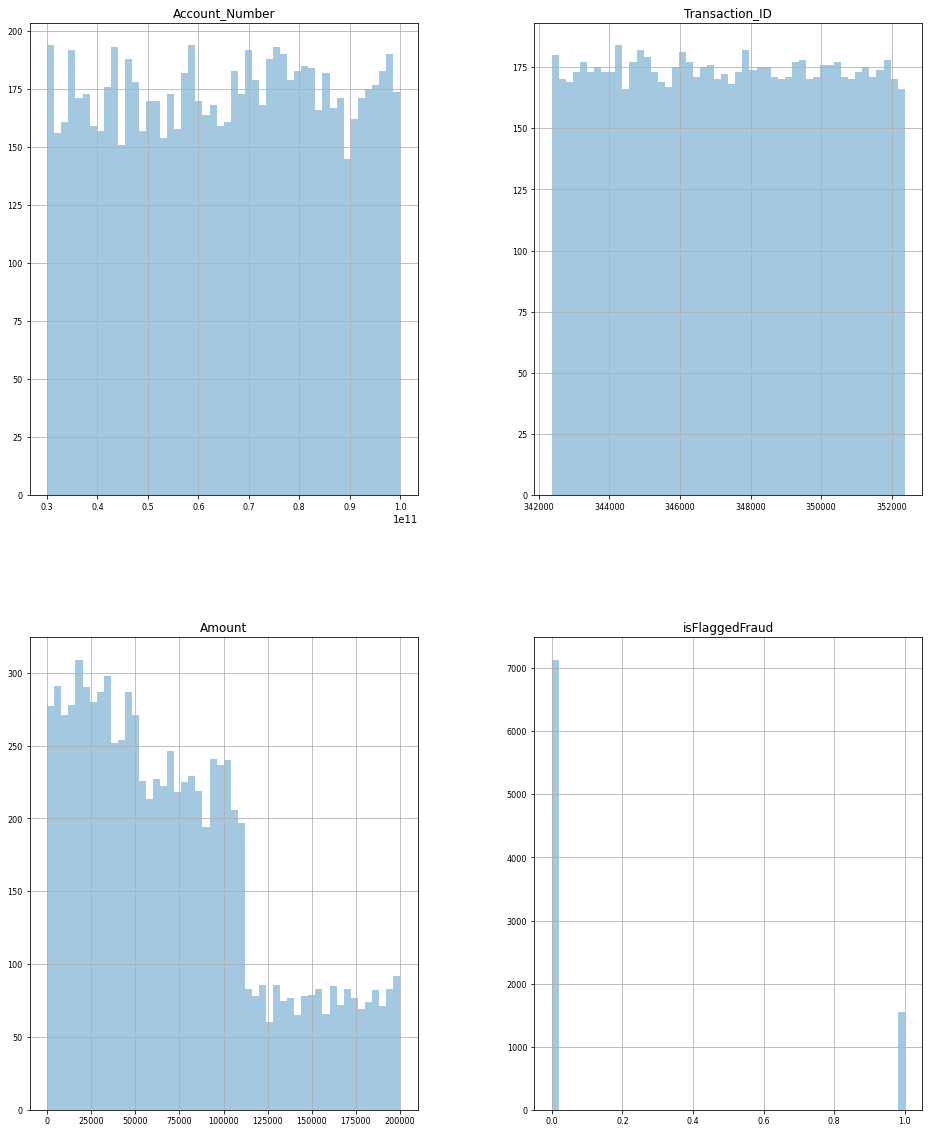

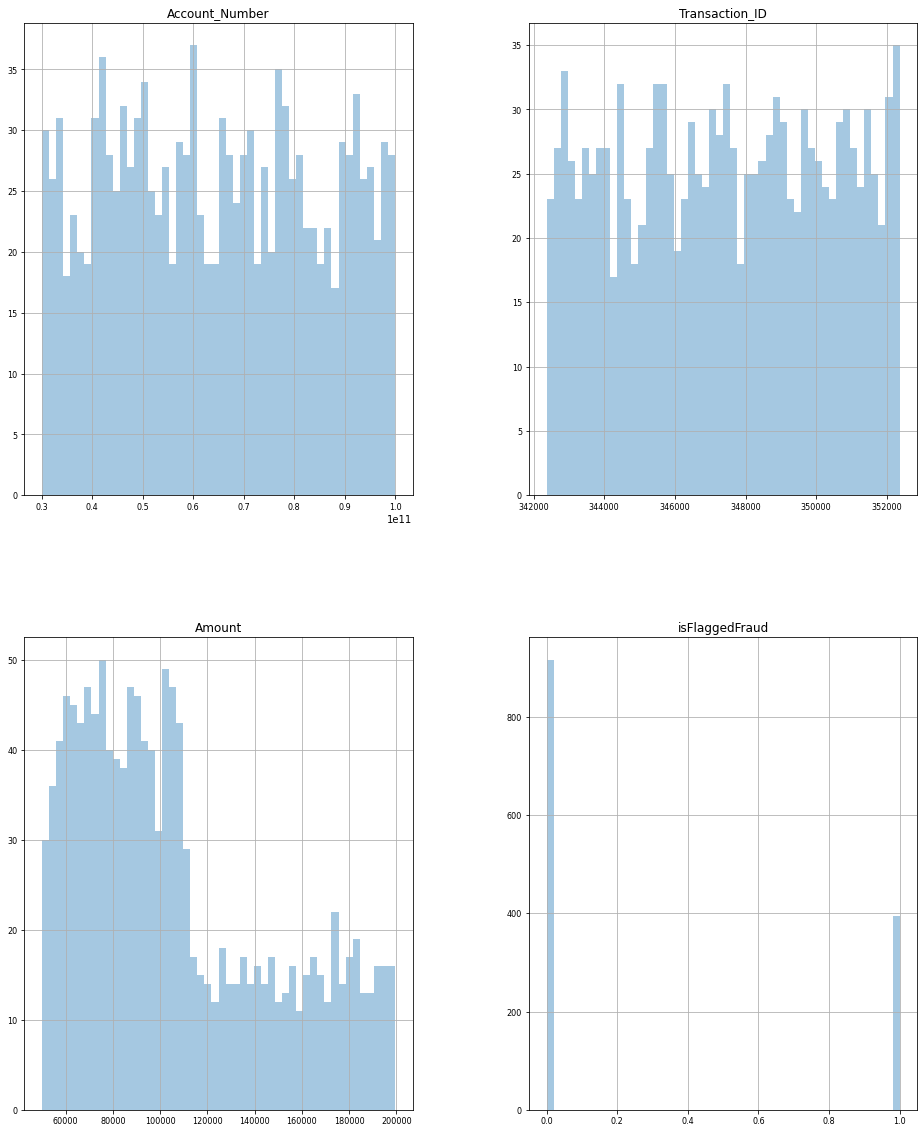

In [34]:
''' Visualising the variables by grouping them by class '''
df.groupby('isFraud').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)

<AxesSubplot:title={'center':'Correlation Matrix'}>

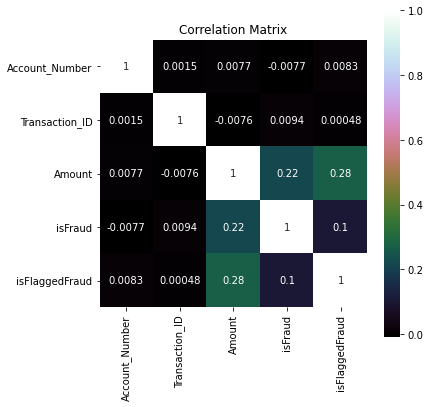

In [36]:
''' co-relation matrix to check multicolinearity between variables '''

correlation = df.corr()
plt.figure(figsize=(6,6))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [37]:
#creating dummy variables for categorical values
dum = pd.get_dummies(df['Mode_of_Transaction'])

df1 = pd.concat([df,dum],axis=1)
df1.drop(['Mode_of_Transaction', 'Txn_Date_Time','Acount_Type', 'Transaction_Type','PAN_Card'],axis=1, inplace=True)

# Using DataFrame.drop
#df.drop(df.columns[[1, 2]], axis=1, inplace=True)

# drop by Name
#df1 = df1.drop(['B', 'C'], axis=1)

0    8688
1    1311
Name: isFraud, dtype: int64
Before OverSampling, counts of label '1': 906
Before OverSampling, counts of label '0': 6093 

After OverSampling, the shape of train_X: (12186, 11)
After OverSampling, the shape of train_y: (12186,) 

After OverSampling, counts of label '1': 6093
After OverSampling, counts of label '0': 6093


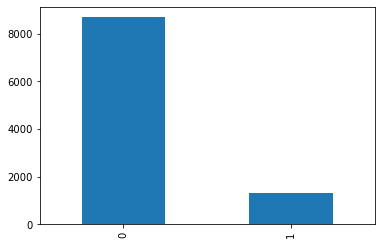

In [38]:
df2 = df1.sample(n=9999)
df2.isFraud.value_counts().plot.bar()
print(df2.isFraud.value_counts())

'''Splitting the data into training and test'''

X_train, X_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3, random_state=0)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

'''resampling the training data'''

sm = SMOTE(random_state=10, sampling_strategy = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [39]:
''' Feature scaling '''

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_res)
x_test_scaled = sc.transform(X_test)

Epoch 1/10
1219/1219 [==============================] - 2s 1ms/step - loss: 0.5532 - accuracy: 0.7330
Epoch 2/10
1219/1219 [==============================] - 1s 1ms/step - loss: 0.3320 - accuracy: 0.8217
Epoch 3/10
1219/1219 [==============================] - 1s 1ms/step - loss: 0.3293 - accuracy: 0.8240
Epoch 4/10
1219/1219 [==============================] - 1s 1ms/step - loss: 0.3212 - accuracy: 0.8260
Epoch 5/10
1219/1219 [==============================] - 1s 1ms/step - loss: 0.3228 - accuracy: 0.8225
Epoch 6/10
1219/1219 [==============================] - 1s 1ms/step - loss: 0.3226 - accuracy: 0.8214
Epoch 7/10
1219/1219 [==============================] - 1s 1ms/step - loss: 0.3226 - accuracy: 0.8244
Epoch 8/10
1219/1219 [==============================] - 1s 1ms/step - loss: 0.3261 - accuracy: 0.8178
Epoch 9/10
1219/1219 [==============================] - 1s 1ms/step - loss: 0.3249 - accuracy: 0.8236
Epoch 10/10
1219/1219 [==============================] - 1s 1ms/step - loss: 0.322

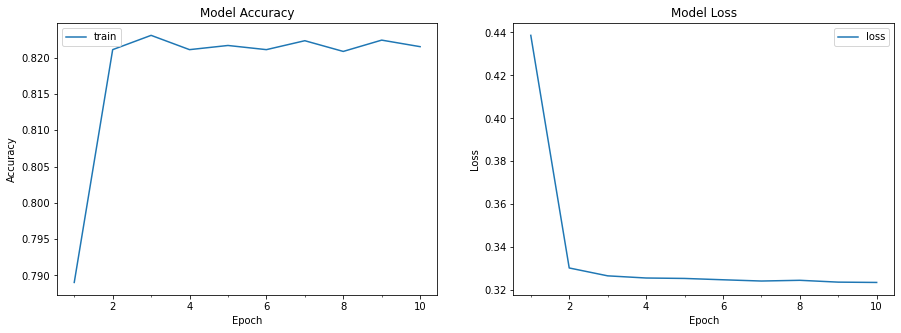

In [40]:
''' Initializing the model '''

model = Sequential()

''' Adding the input layer and the first hidden layer '''

model.add(Dense(6,  activation = 'relu', kernel_initializer = 'uniform', input_dim=11))
#(Dense(6, activation='relu', kernel_initializer='glorot_uniform',input_dim=11))

''' Adding the second hidden layer '''

model.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))

''' Adding the output layer '''

model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

''' Compiling and fitting the model '''

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_info = model.fit(x_train_scaled, y_train_res, batch_size = 10, epochs = 10)

''' Plotting the training curves '''

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    ''' History for accuracy'''
    
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train'], loc='best')
    
    ''' History for loss'''
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['loss'], loc='best')
    plt.show()
    
plot_model_history(model_info)

In [41]:
''' Predicting the test results '''

y_pred = model.predict_classes(x_test_scaled)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

Accuracy: 79.7


In [42]:
''' Generating the Confusion matrix and Classification report'''

print('Confusion matrix', '\n', confusion_matrix(y_test, y_pred), '\n')
print('Classification report', '\n', classification_report(y_test, y_pred), '\n')

Confusion matrix 
 [[2329  266]
 [ 343   62]] 

Classification report 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      2595
           1       0.19      0.15      0.17       405

    accuracy                           0.80      3000
   macro avg       0.53      0.53      0.53      3000
weighted avg       0.78      0.80      0.79      3000
 

